In [24]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import models

In [25]:
input_features = 32
output_features = 64
timestamps = 100
inputs = np.random.random((timestamps, input_features))
state_t = np.zeros((output_features))
successive_outputs = []
w = np.random.random((output_features, input_features))
u = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

for i in inputs:
    output = np.tanh(np.dot(w, i) + np.dot(state_t, u) + b)
    successive_outputs.append(output)
    state_t = output
final_output = np.concatenate(successive_outputs, axis = 0)

In [26]:
max_features = 10000
sequence = 500
batch_size = 32
(xtrain, ytrain),(xtest, ytest) = imdb.load_data(maxlen = max_features)

xtrain = pad_sequences(xtrain, maxlen = sequence)
xtest = pad_sequences(xtest, maxlen= sequence)

In [27]:
model = models.Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'acc')

In [30]:
history = model.fit(xtrain, ytrain, epochs = 12, batch_size = batch_size, validation_split = 0.2)

Epoch 1/12
625/625 [==============================] - 303s 482ms/step - loss: 0.5153 - acc: 0.7415 - val_loss: 0.4007 - val_acc: 0.8292
Epoch 2/12
625/625 [==============================] - 279s 447ms/step - loss: 0.3432 - acc: 0.8594 - val_loss: 0.3366 - val_acc: 0.8608
Epoch 3/12
625/625 [==============================] - 268s 428ms/step - loss: 0.2897 - acc: 0.8874 - val_loss: 0.3539 - val_acc: 0.8462
Epoch 4/12
625/625 [==============================] - 264s 423ms/step - loss: 0.2663 - acc: 0.8950 - val_loss: 0.4017 - val_acc: 0.8170
Epoch 5/12
625/625 [==============================] - 259s 415ms/step - loss: 0.2320 - acc: 0.9135 - val_loss: 0.4551 - val_acc: 0.8414
Epoch 6/12
625/625 [==============================] - 260s 417ms/step - loss: 0.2051 - acc: 0.9222 - val_loss: 0.3685 - val_acc: 0.8576
Epoch 7/12
625/625 [==============================] - 260s 416ms/step - loss: 0.1944 - acc: 0.9283 - val_loss: 0.4535 - val_acc: 0.8460
Epoch 8/12
625/625 [============================

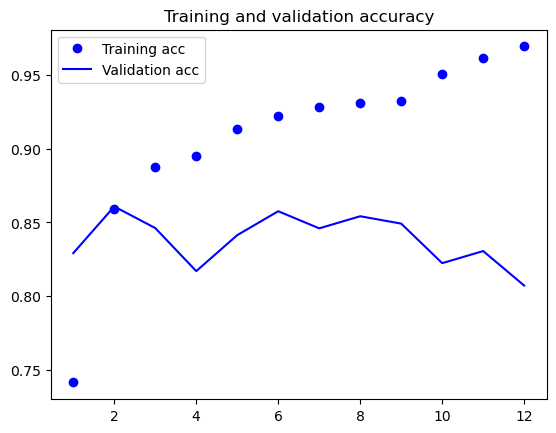

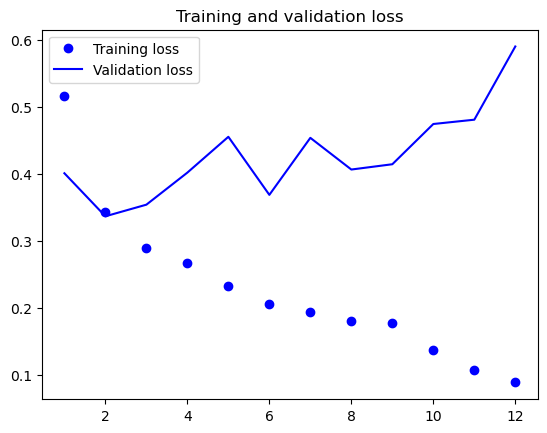

In [31]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()